In [1]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [2]:
import numpy as np
import pickle
def gen_data():
    rng = np.random.default_rng()

    n = 200
    n_train_test = 180

    x_1 = rng.standard_normal(n)
    x_2 = rng.standard_normal(n)
    x_3 = rng.standard_normal(n)
    x_m = [rng.standard_normal(n) for _ in range(n)]

    Y = x_1 + 0.5*x_2 + 0.1 * x_3 
    return [n, n_train_test, x_1, x_2, x_3, x_m, Y]

def save_data(n, n_train_test, x_1, x_2, x_3, x_m, Y):
    with open("theorie_data.pkl","wb") as f:
        pickle.dump([n, n_train_test, x_1, x_2, x_3, x_m, Y],f)
        
def load_data():
    with open("theorie_data.pkl","rb") as f:
        return pickle.load(f)
        
try:
    [n, n_train_test, x_1, x_2, x_3, x_m, Y] = load_data()
    print("loaded data")
except OSError as e:
    [n, n_train_test, x_1, x_2, x_3, x_m, Y] = gen_data()
    save_data(n, n_train_test, x_1, x_2, x_3, x_m, Y)
    print("generated new data, pleas regenerate the images")

Y_train = Y[:n_train_test]
Y_test = Y[n_train_test:]

x_1_train = x_1[:n_train_test]
x_1_test = x_1[n_train_test:]

x_2_train = x_2[:n_train_test]
x_2_test = x_2[n_train_test:]

x_3_train = x_3[:n_train_test]
x_3_test = x_3[n_train_test:]

x_m_train = [x[:n_train_test] for x in x_m]
x_m_test = [x[n_train_test:] for x in x_m]


loaded data


In [3]:
%matplotlib inline
import matplotlib.pyplot as pp
import matplotlib
cm = 1/2.54
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams["figure.figsize"] = (14.96*cm,10.98*cm) 
from sklearn.linear_model import LinearRegression, Ridge, Lasso

color_train_data = "tab:blue"
color_test_data = "tab:blue"
color_pred_data = "tab:orange"

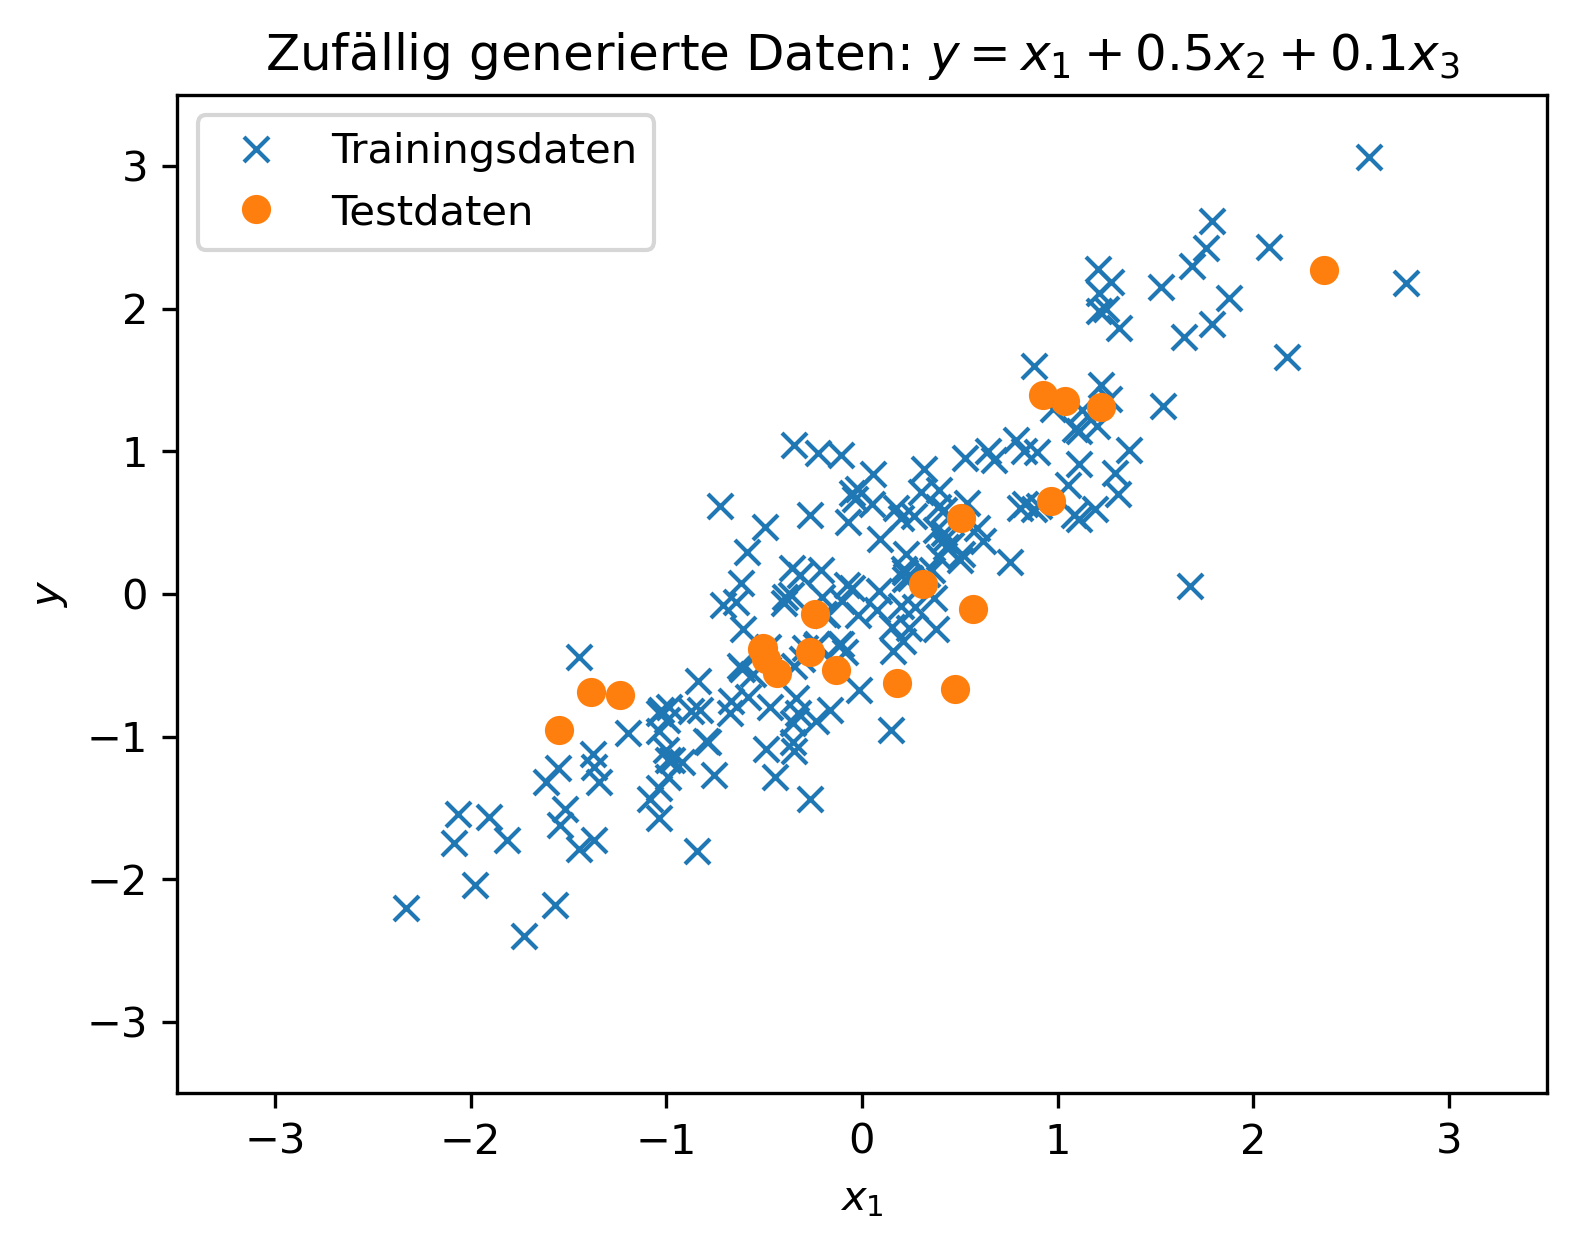

In [4]:
pp.figure()
pp.plot(x_1_train,Y_train,"x", label = "Trainingsdaten", color=color_train_data)
pp.plot(x_1_test,Y_test,"o", label = "Testdaten", color="tab:orange")

pp.ylabel("$y$")
pp.xlabel("$x_1$")
pp.legend()
pp.ylim([-3.5,3.5])
pp.xlim([-3.5,3.5])
pp.title("Zufällig generierte Daten: $y = x_1 + 0.5 x_2 + 0.1 x_3$")
pp.savefig("random_data_train-test")

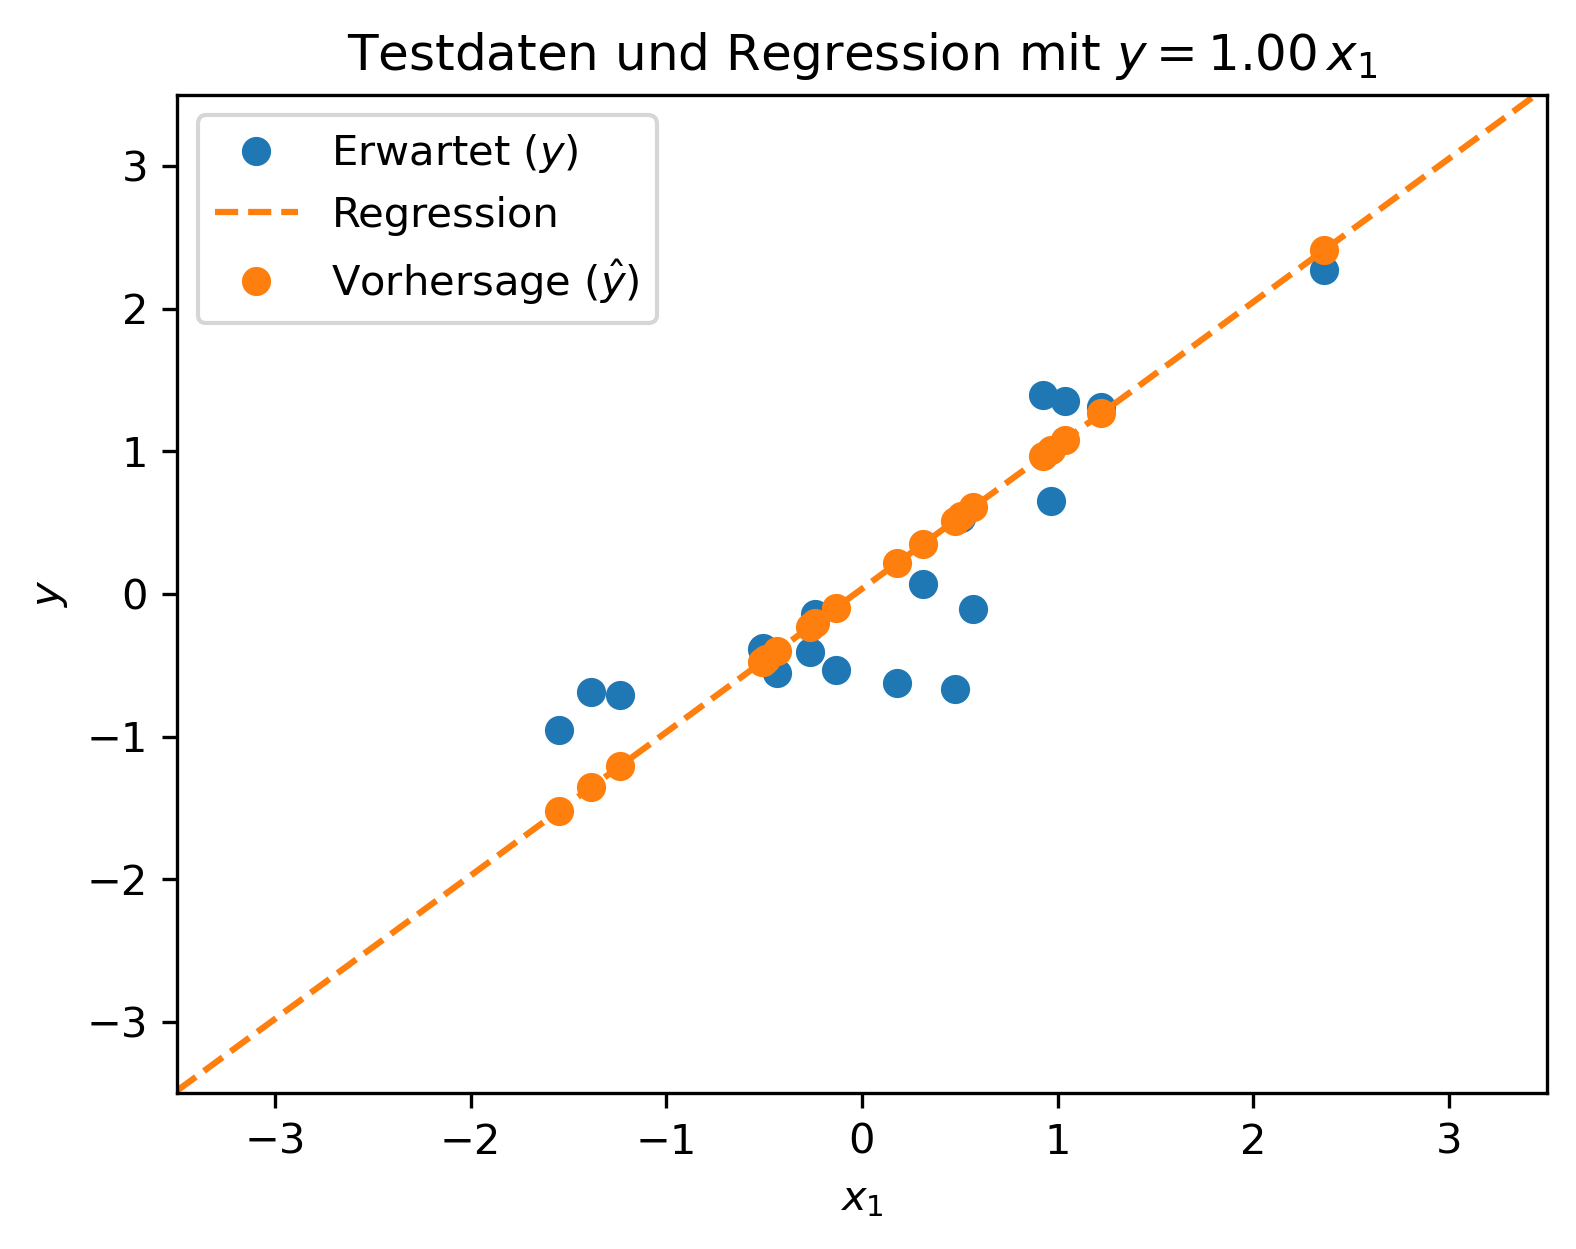

In [12]:
X_train = np.asarray([x_1_train]).transpose()
X_test = np.asarray([x_1_test]).transpose()

reg = LinearRegression().fit(X_train, Y_train)

Y_ = reg.predict(X_train)

Y_ = reg.predict(X_test)

x_line = np.linspace(-3.5,3.5,1000)
x_line = np.asarray([x_line]).transpose()
Y_line = reg.predict(x_line)

pp.plot(x_1_test, Y_test, "o", label="Erwartet ($y$)", color=color_test_data)
pp.plot(x_line, Y_line, "--", label="Regression", color=color_pred_data)
pp.plot(x_1_test, Y_, "o", label="Vorhersage ($\\hat{y}$)", color=color_pred_data)


pp.ylabel("$y$")
pp.xlabel("$x_1$")
pp.legend()
pp.ylim([-3.5,3.5])
pp.xlim([-3.5,3.5])
pp.title(f"Testdaten und Regression mit $y = {reg.coef_[0]:.2f} \\, x_1$")
pp.savefig("random_data_train-test_reg")

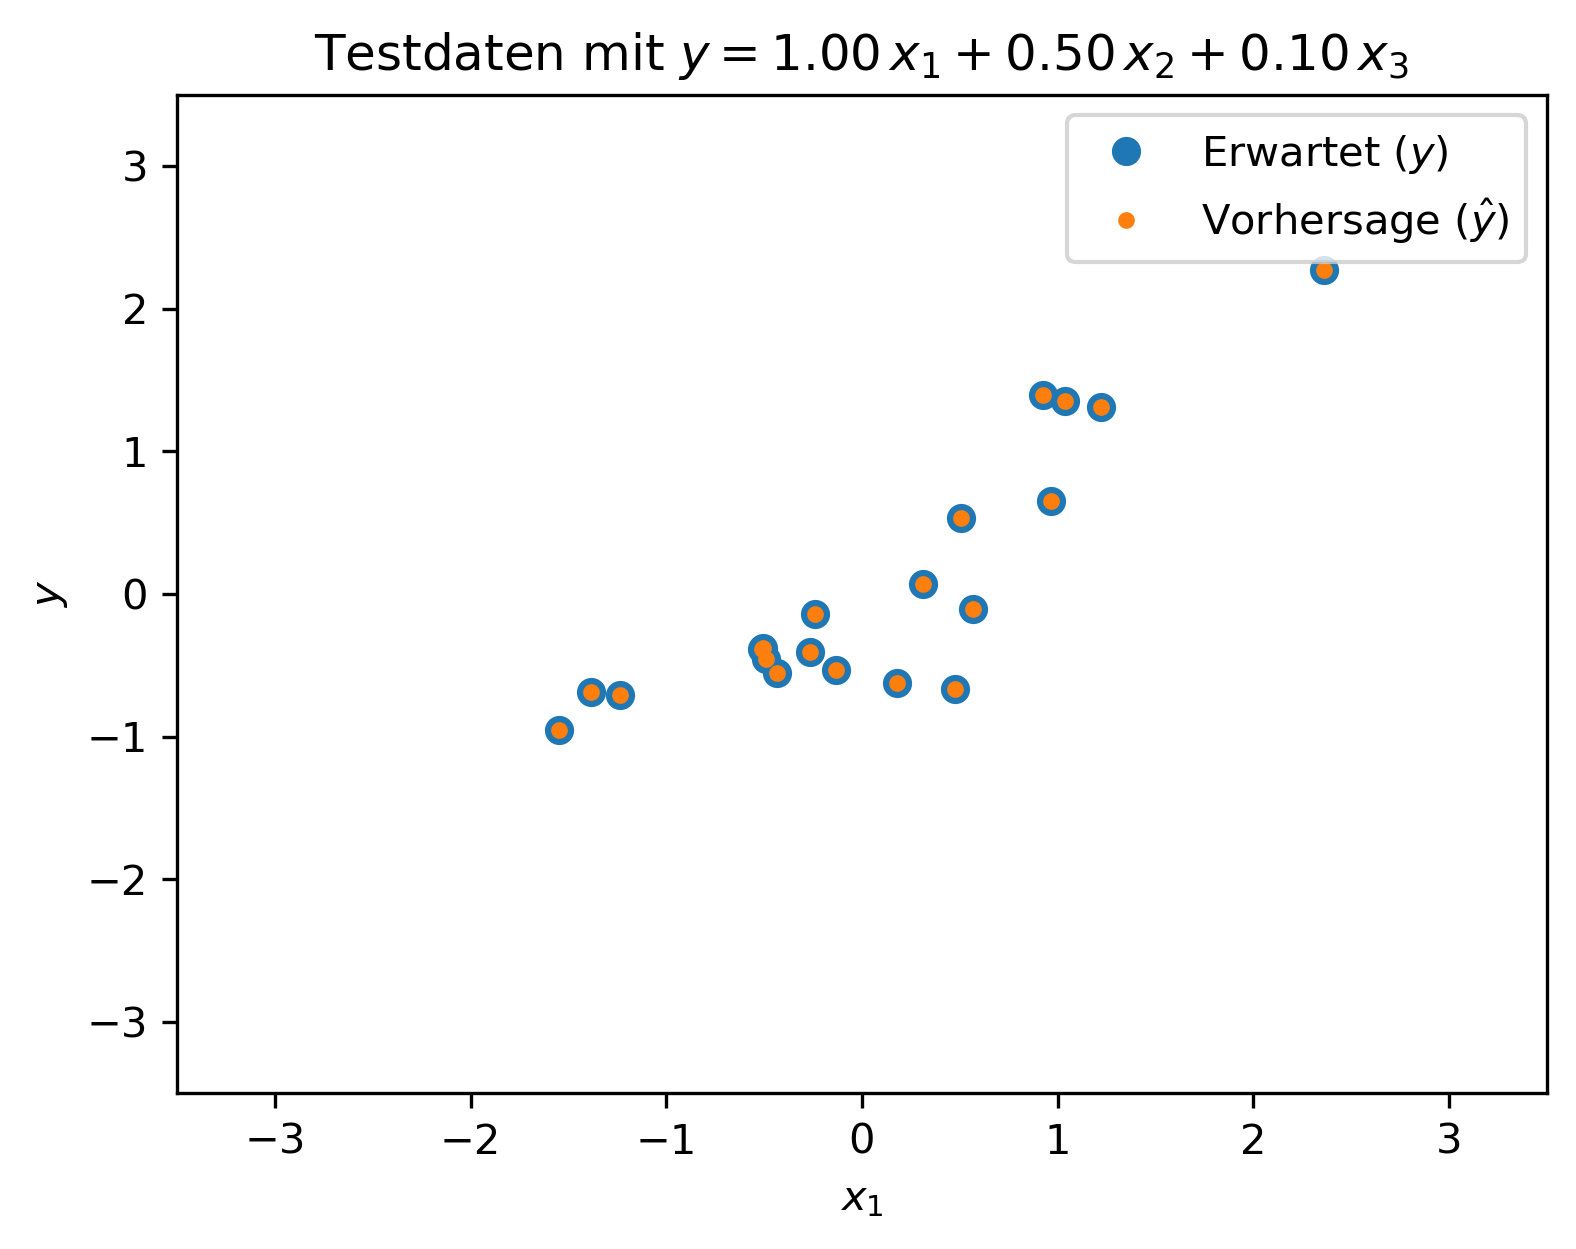

In [7]:
X_train = np.asarray([x_1_train, x_2_train, x_3_train]).transpose()
X_test = np.asarray([x_1_test, x_2_test, x_3_test]).transpose()

reg = LinearRegression().fit(X_train, Y_train)

Y_ = reg.predict(X_train)

Y_ = reg.predict(X_test)

pp.plot(x_1_test, Y_test, "o", label="Erwartet ($y$)", color=color_test_data)
pp.plot(x_1_test, Y_, ".", label="Vorhersage ($\\hat{y}$)", color=color_pred_data)


pp.ylabel("$y$")
pp.xlabel("$x_1$")
pp.legend()
pp.ylim([-3.5,3.5])
pp.xlim([-3.5,3.5])
pp.title(f"Testdaten mit $y = {reg.coef_[0]:.2f} \\, x_1 + {reg.coef_[1]:.2f} \\, x_2 + {reg.coef_[2]:.2f} \\, x_3$")
pp.savefig("random_data_train-test_reg_3")

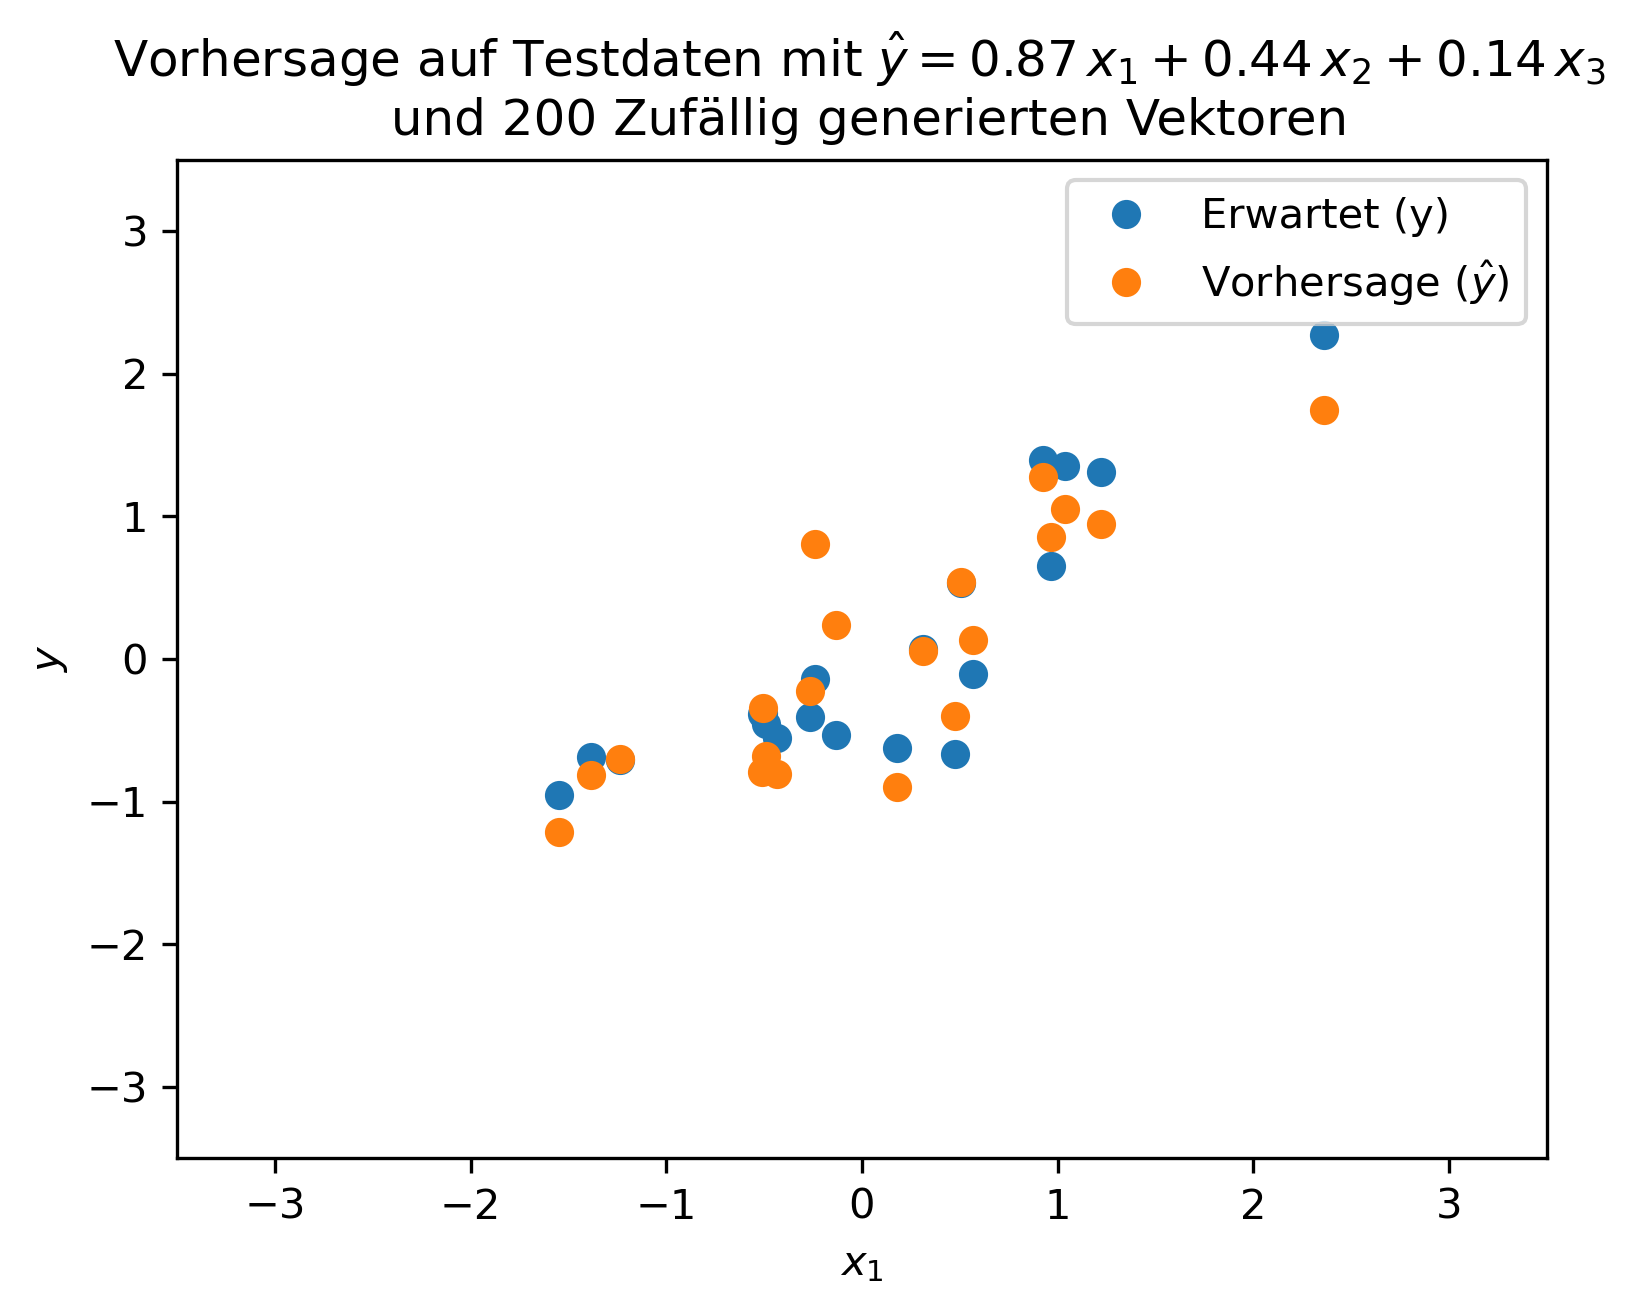

In [8]:
X_train = np.asarray([x_1_train, x_2_train, x_3_train] + x_m_train).transpose()
X_test = np.asarray([x_1_test, x_2_test, x_3_test] + x_m_test).transpose()


reg = LinearRegression().fit(X_train, Y_train)

reg = LinearRegression().fit(X_train, Y_train)

Y_ = reg.predict(X_train)

Y_ = reg.predict(X_test)

pp.plot(x_1_test, Y_test, "o", label="Erwartet (y)", color=color_test_data)
pp.plot(x_1_test, Y_, "o", label="Vorhersage ($\\hat{y}$)", color=color_pred_data)

pp.ylabel("$y$")
pp.xlabel("$x_1$")
pp.legend()
pp.ylim([-3.5,3.5])
pp.xlim([-3.5,3.5])
pp.title(f"Vorhersage auf Testdaten mit $\\hat{{y}} = {reg.coef_[0]:.2f} \\, x_1 + {reg.coef_[1]:.2f} \\, x_2 + {reg.coef_[2]:.2f} \\, x_3$ \n und {n} Zufällig generierten Vektoren")
pp.savefig("random_data_train-test_overfit_test")

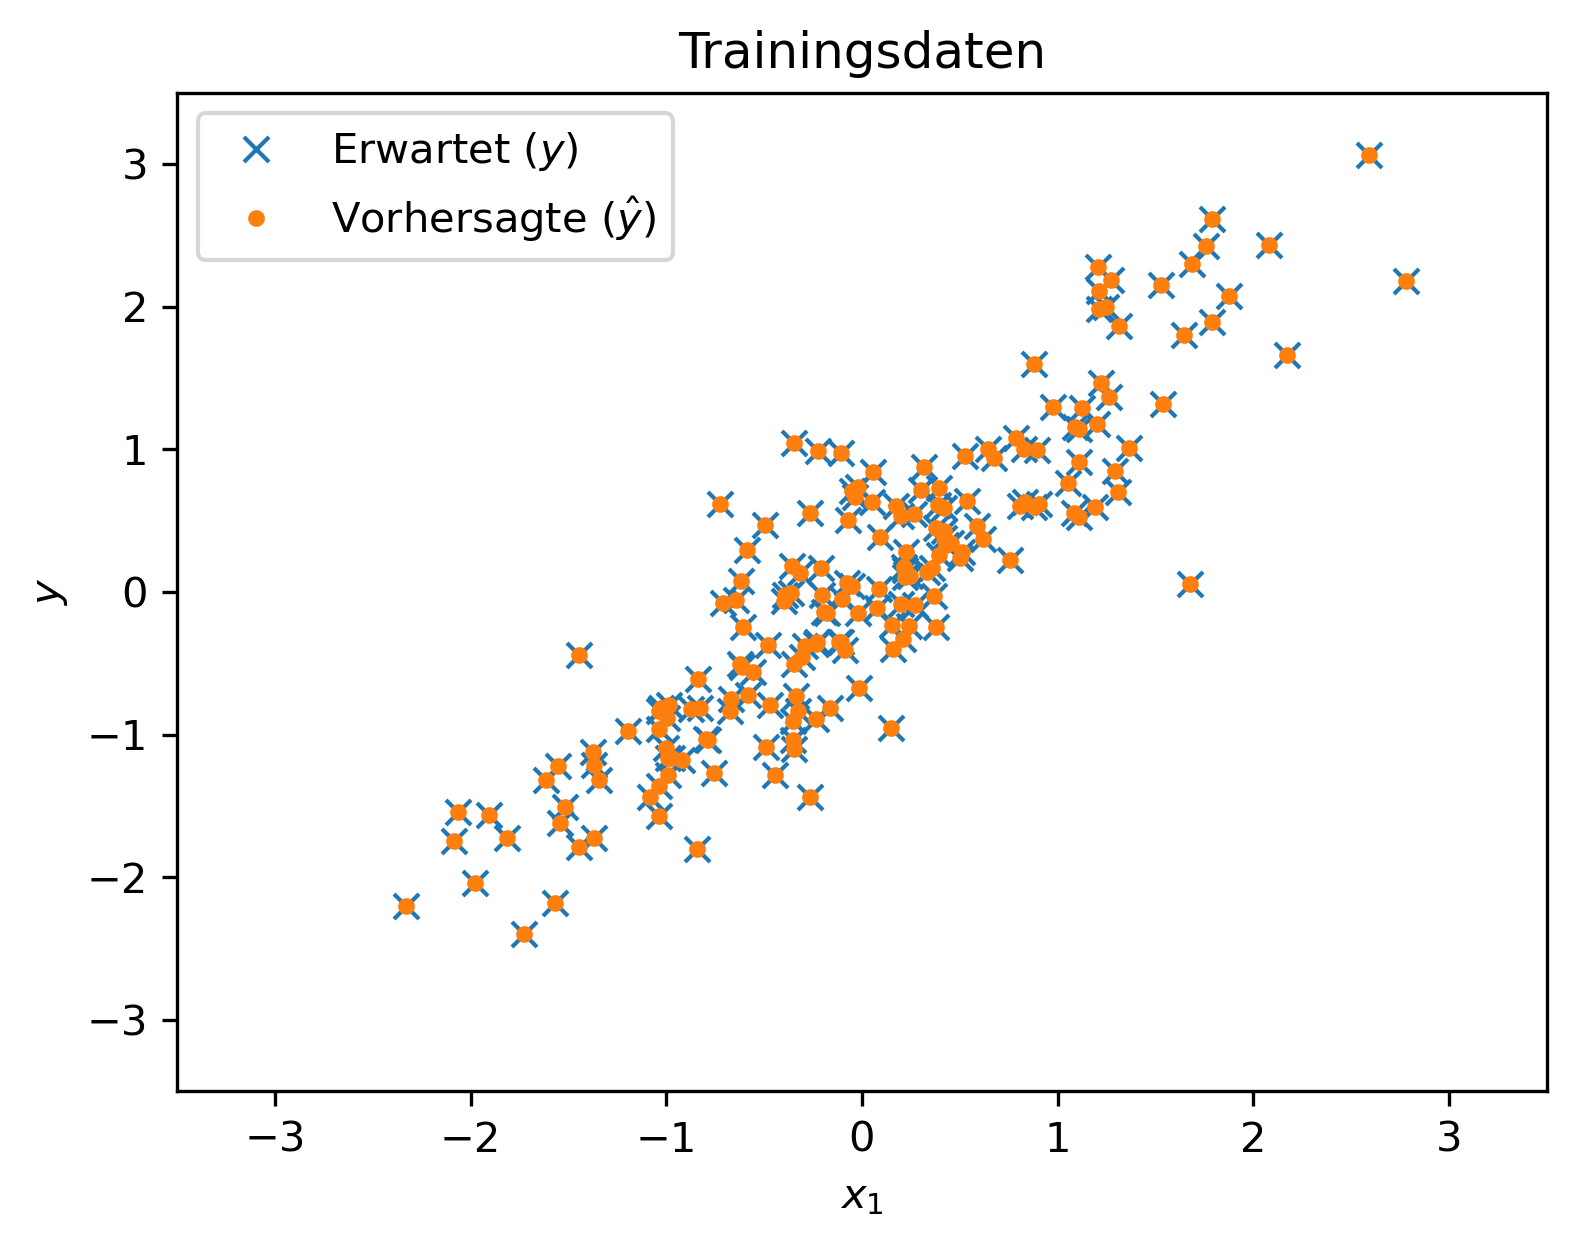

In [9]:
X_train = np.asarray([x_1_train, x_2_train, x_3_train] + x_m_train).transpose()
X_test = np.asarray([x_1_test, x_2_test, x_3_test] + x_m_test).transpose()

reg = LinearRegression().fit(X_train, Y_train)

reg = LinearRegression().fit(X_train, Y_train)

Y_ = reg.predict(X_train)

pp.plot(x_1_train, Y_train, "x", label="Erwartet ($y$)", color=color_test_data)
pp.plot(x_1_train, Y_, ".", label="Vorhersagte ($\\hat{y}$)", color=color_pred_data)


Y_ = reg.predict(X_test)

pp.ylabel("$y$")
pp.xlabel("$x_1$")
pp.legend()
pp.ylim([-3.5,3.5])
pp.xlim([-3.5,3.5])
pp.title(f"Trainingsdaten")
pp.savefig("random_data_train-test_overfit_train")


\hat{y}=0.01 + 0.83 x_1 + 0.43 x_2 + 0.13 x_3


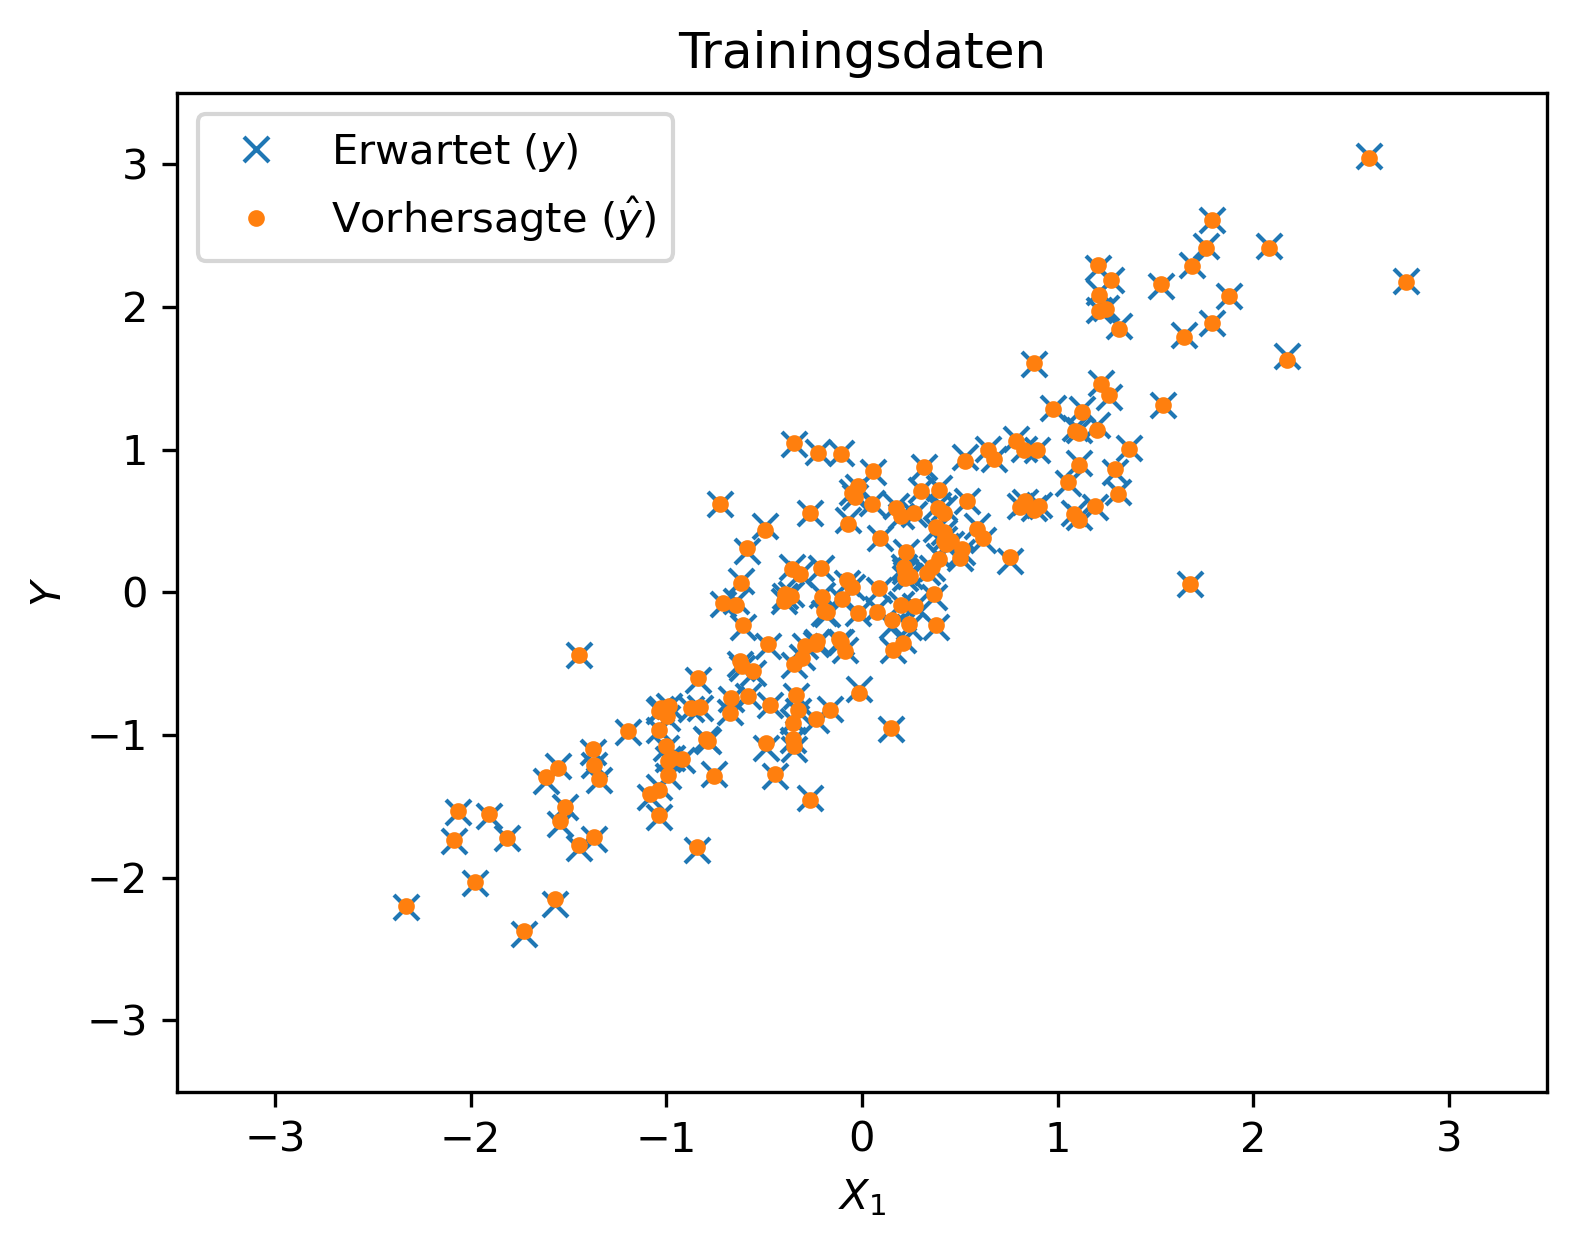

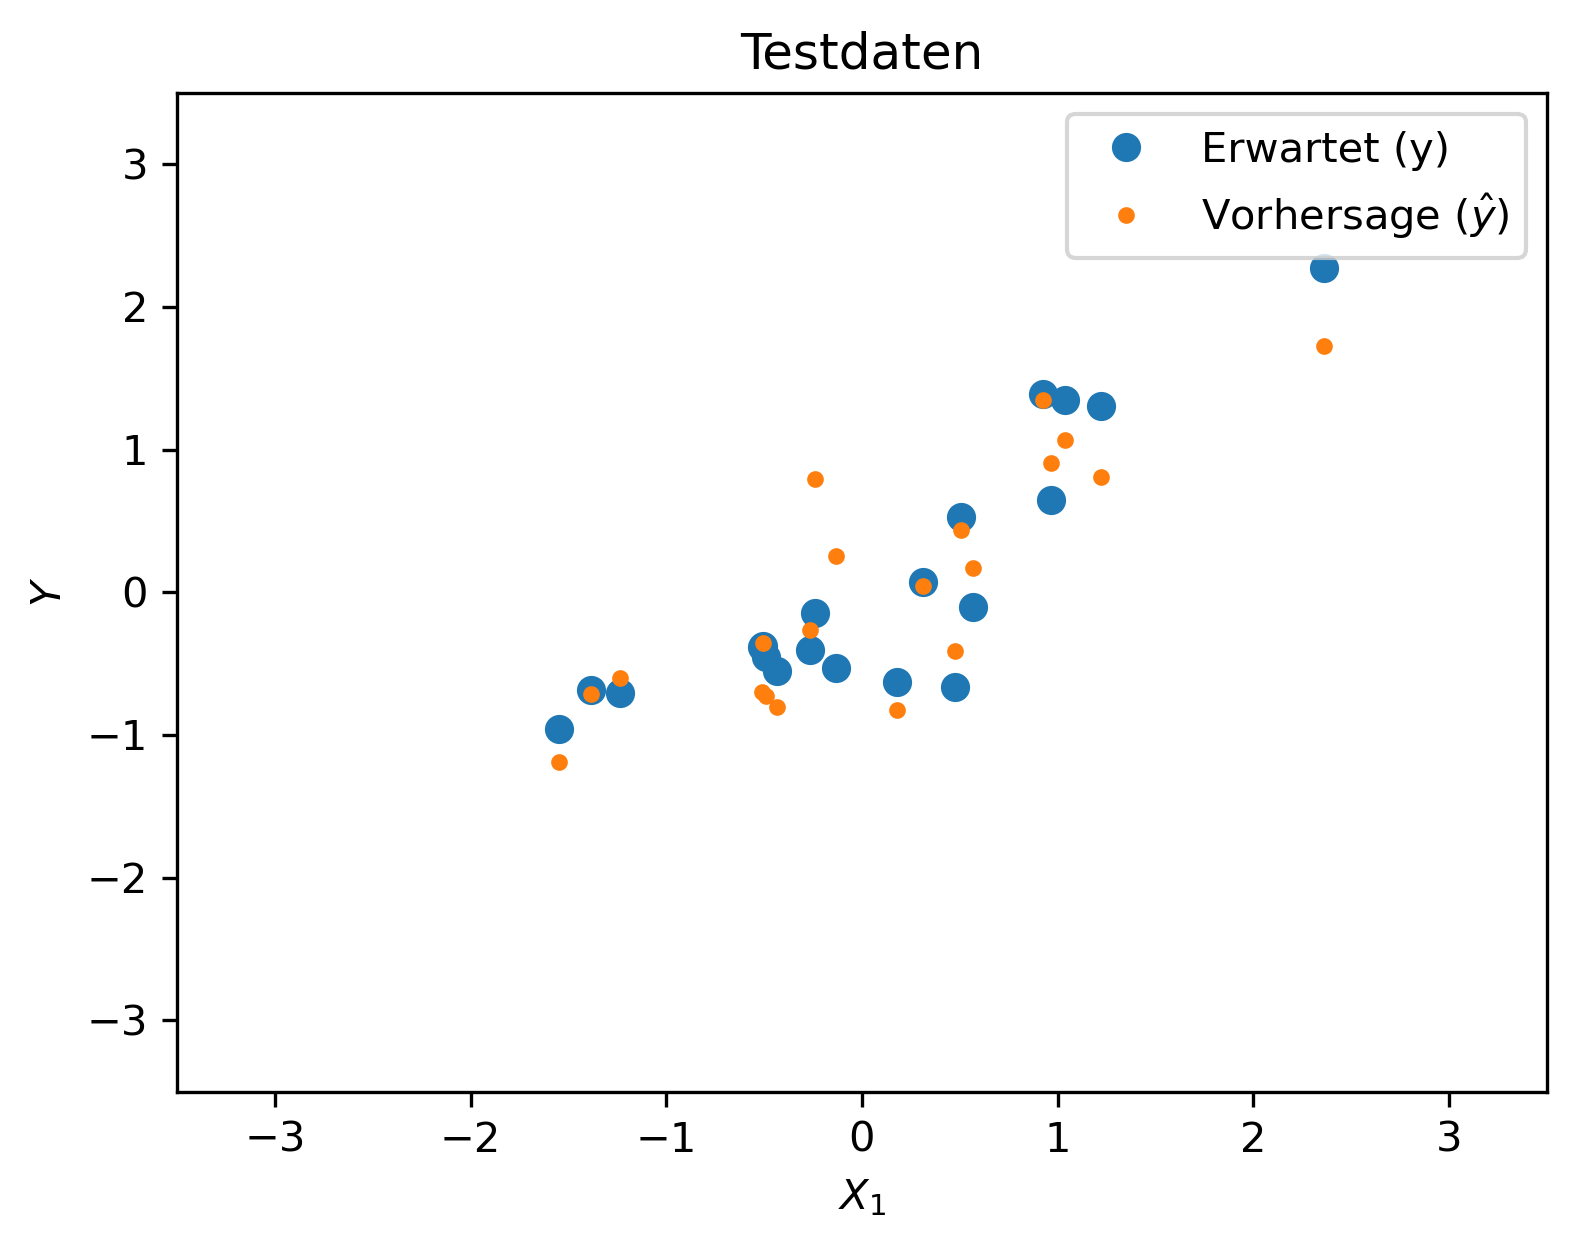

In [10]:
X_train = np.asarray([x_1_train, x_2_train, x_3_train] + x_m_train).transpose()
X_test = np.asarray([x_1_test, x_2_test, x_3_test] + x_m_test).transpose()

reg = Ridge(alpha=1).fit(X_train, Y_train)


Y_ = reg.predict(X_train)

print(f"\\hat{{y}}={reg.intercept_:.2f} + {reg.coef_[0]:.2f} x_1 + {reg.coef_[1]:.2f} x_2 + {reg.coef_[2]:.2f} x_3")

pp.plot(x_1_train, Y_train, "x", label="Erwartet ($y$)", color=color_test_data)
pp.plot(x_1_train, Y_, ".", label="Vorhersagte ($\\hat{y}$)", color=color_pred_data)
pp.legend()
pp.ylabel("$Y$")
pp.xlabel("$X_1$")
pp.ylim([-3.5,3.5])
pp.xlim([-3.5,3.5])
pp.title(f"Trainingsdaten")



X_test = np.asarray([x_1_test, x_2_test, x_3_test] + x_m_test).transpose()
Y_ = reg.predict(X_test)

pp.figure()
pp.plot(x_1_test, Y_test, "o", label="Erwartet (y)", color=color_test_data)
pp.plot(x_1_test, Y_, ".", label="Vorhersage ($\\hat{y}$)", color=color_pred_data)
pp.xlabel("x_1")
pp.ylabel("Y")

pp.ylabel("$Y$")
pp.xlabel("$X_1$")
pp.legend()
pp.ylim([-3.5,3.5])
pp.xlim([-3.5,3.5])
pp.title(f"Testdaten")

pp.savefig("random_data_train-test_overfit_ridge")


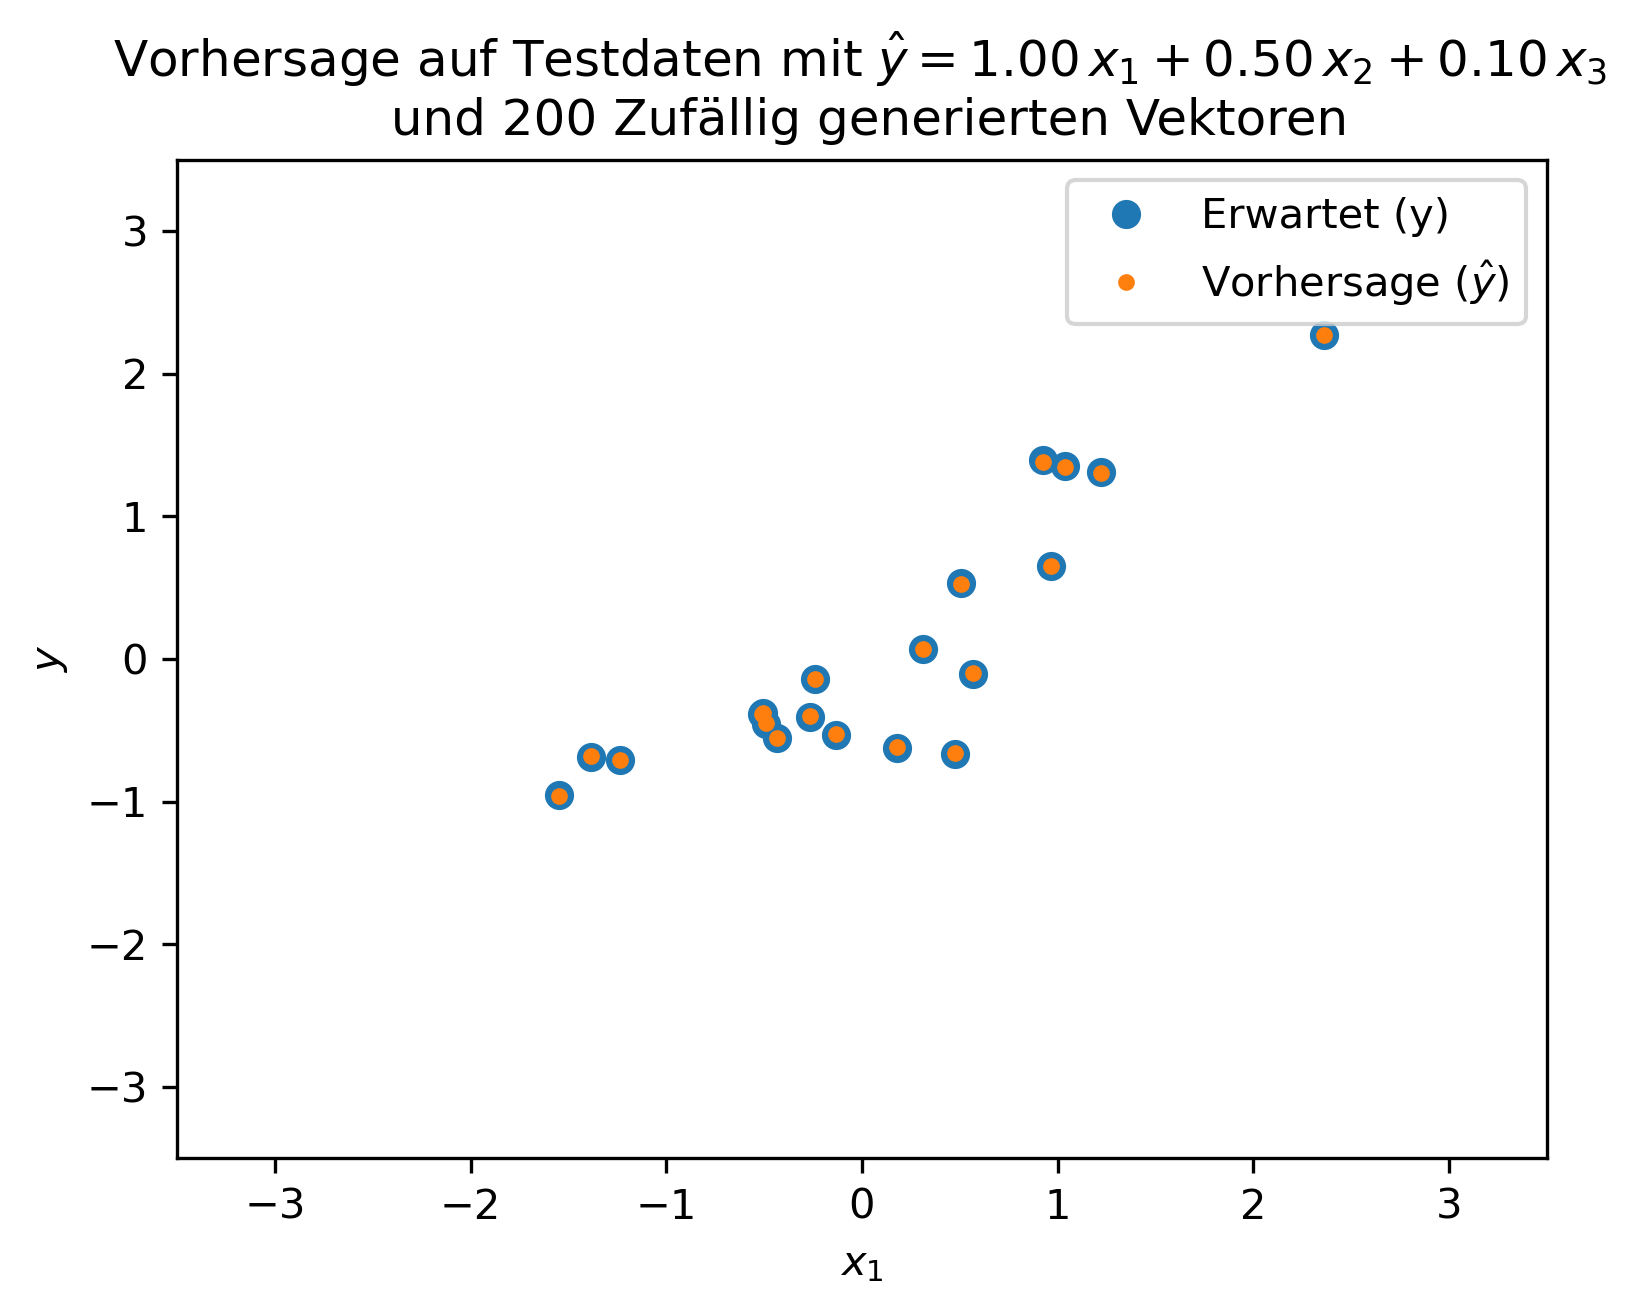

In [11]:
X_train = np.asarray([x_1_train, x_2_train, x_3_train] + x_m_train).transpose()

reg = Lasso(alpha=(1/(2*len(x_1_train)))).fit(X_train, Y_train)


Y_ = reg.predict(X_train)

X_test = np.asarray([x_1_test, x_2_test, x_3_test] + x_m_test).transpose()
Y_ = reg.predict(X_test)



pp.plot(x_1_test, Y_test, "o", label="Erwartet (y)", color=color_test_data)
pp.plot(x_1_test, Y_, ".", label="Vorhersage ($\\hat{y}$)", color=color_pred_data)
pp.title(f"Vorhersage auf Testdaten mit $\\hat{{y}} = {reg.coef_[0]:.2f} \\, x_1 + {reg.coef_[1]:.2f} \\, x_2 + {reg.coef_[2]:.2f} \\, x_3$ \n und {n} Zufällig generierten Vektoren")

pp.ylabel("$y$")
pp.xlabel("$x_1$")
pp.legend()
pp.ylim([-3.5,3.5])
pp.xlim([-3.5,3.5])
pp.savefig("random_data_train-test_overfit_test_lasso")